In [ ]:
import ollama

# nomic-embed-text has a dimention of 768
ollama.embeddings(model='nomic-embed-text', prompt='hello i am a chatbot')

In [9]:
def plot_embeddings_3d(words, embedding_model='nomic-embed-text'):
    # Dictionary to store embeddings
    vector_store = {}
    
    # Generate embeddings using ollama
    for word in words:
        embedding = ollama.embeddings(model=embedding_model, prompt=word)
        vector_store[word] = embedding['embedding']  # Assuming the embedding is stored under 'embedding' key
    
    # Convert embeddings to a numpy array for PCA
    embeddings = np.array([vector_store[word] for word in words])
    
    # Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the 3D graph
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each word in the 3D space
    for i, word in enumerate(words):
        ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], label=word)
        ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], word)
    
    # Set labels for the axes
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    
    # Show the plot
    plt.show()

In [34]:
words = ['Cease', 'terminate', 'desist', 'Begin', 'Originate', 
         'Abundant', 'Plentiful', 'Scarce', 'Limited', 'Ample', 'Bountiful', 'Rare']

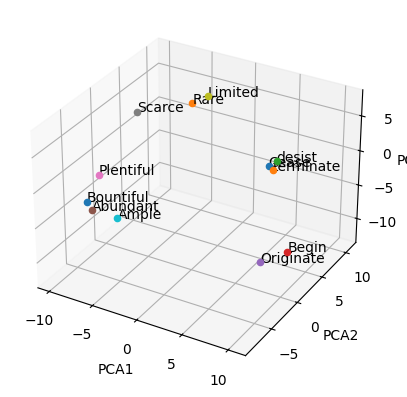

In [35]:
plot_embeddings_3d(words)

In [37]:
import weaviate
import weaviate.classes.config as wc
import weaviate.classes as wvc

client = weaviate.connect_to_local()

if not client.collections.exists(name = 'dev_day_demo'):
    client.collections.create(name = 'dev_day_demo')

collection = client.collections.get('dev_day_demo')

In [40]:
weaviate_docs = []

for index, word in enumerate(words):
    weaviate_doc = wvc.data.DataObject(
        properties={
            'message': word,
        },
        vector=list(ollama.embeddings(model='nomic-embed-text', prompt=word)['embedding'])
    )
    weaviate_docs.append(weaviate_doc)
      

In [41]:
collection.data.insert_many(weaviate_docs)

BatchObjectReturn(_all_responses=[UUID('5159c1aa-508f-46d8-9dfb-95d086ae3255'), UUID('bfe5bbdf-10e5-409d-bdfd-ac4c027e823a'), UUID('36f19247-22ad-4952-a7e6-64b6585af720'), UUID('39acbab8-1c93-40d1-a1fc-b6b35db5a1ee'), UUID('9a26c465-0a20-4271-8cd5-1d84c0621fef'), UUID('cefe869d-67a5-45d9-a8ec-c05ddf8788c3'), UUID('38e6e57c-4da5-407b-be33-9c6dcdf95617'), UUID('6df7c184-c285-4440-ba90-55527d5100f7'), UUID('6e7f4ba7-dfd6-47f3-950a-5a1c6f76cbd7'), UUID('c2710f15-703b-47b8-8c09-80dfd7dcaf5a'), UUID('a21679a0-e476-4c02-bdcd-7872239760cf'), UUID('30ba0726-c355-4e06-8f19-707e198821ee')], elapsed_seconds=0.05849599838256836, errors={}, uuids={0: UUID('5159c1aa-508f-46d8-9dfb-95d086ae3255'), 1: UUID('bfe5bbdf-10e5-409d-bdfd-ac4c027e823a'), 2: UUID('36f19247-22ad-4952-a7e6-64b6585af720'), 3: UUID('39acbab8-1c93-40d1-a1fc-b6b35db5a1ee'), 4: UUID('9a26c465-0a20-4271-8cd5-1d84c0621fef'), 5: UUID('cefe869d-67a5-45d9-a8ec-c05ddf8788c3'), 6: UUID('38e6e57c-4da5-407b-be33-9c6dcdf95617'), 7: UUID('6df7c1

In [61]:
retrieved_docs = collection.query.near_vector(
    near_vector=list(ollama.embeddings(model='nomic-embed-text', prompt='more than enough')['embedding']),
    limit=2,
    return_metadata=wvc.query.MetadataQuery(certainty=True)
)

[(o.properties['message'], o.metadata.certainty) for o in retrieved_docs.objects]


[('Abundant', 0.7813969850540161), ('Plentiful', 0.775922954082489)]

In [62]:
retrieved_docs = collection.query.near_vector(
    near_vector=list(ollama.embeddings(model='nomic-embed-text', prompt='in short supply')['embedding']),
    limit=2,
    return_metadata=wvc.query.MetadataQuery(certainty=True)
)

[(o.properties['message'], o.metadata.certainty) for o in retrieved_docs.objects]

[('Limited', 0.8176659345626831), ('Scarce', 0.7924264669418335)]